In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Mounted at /content/drive


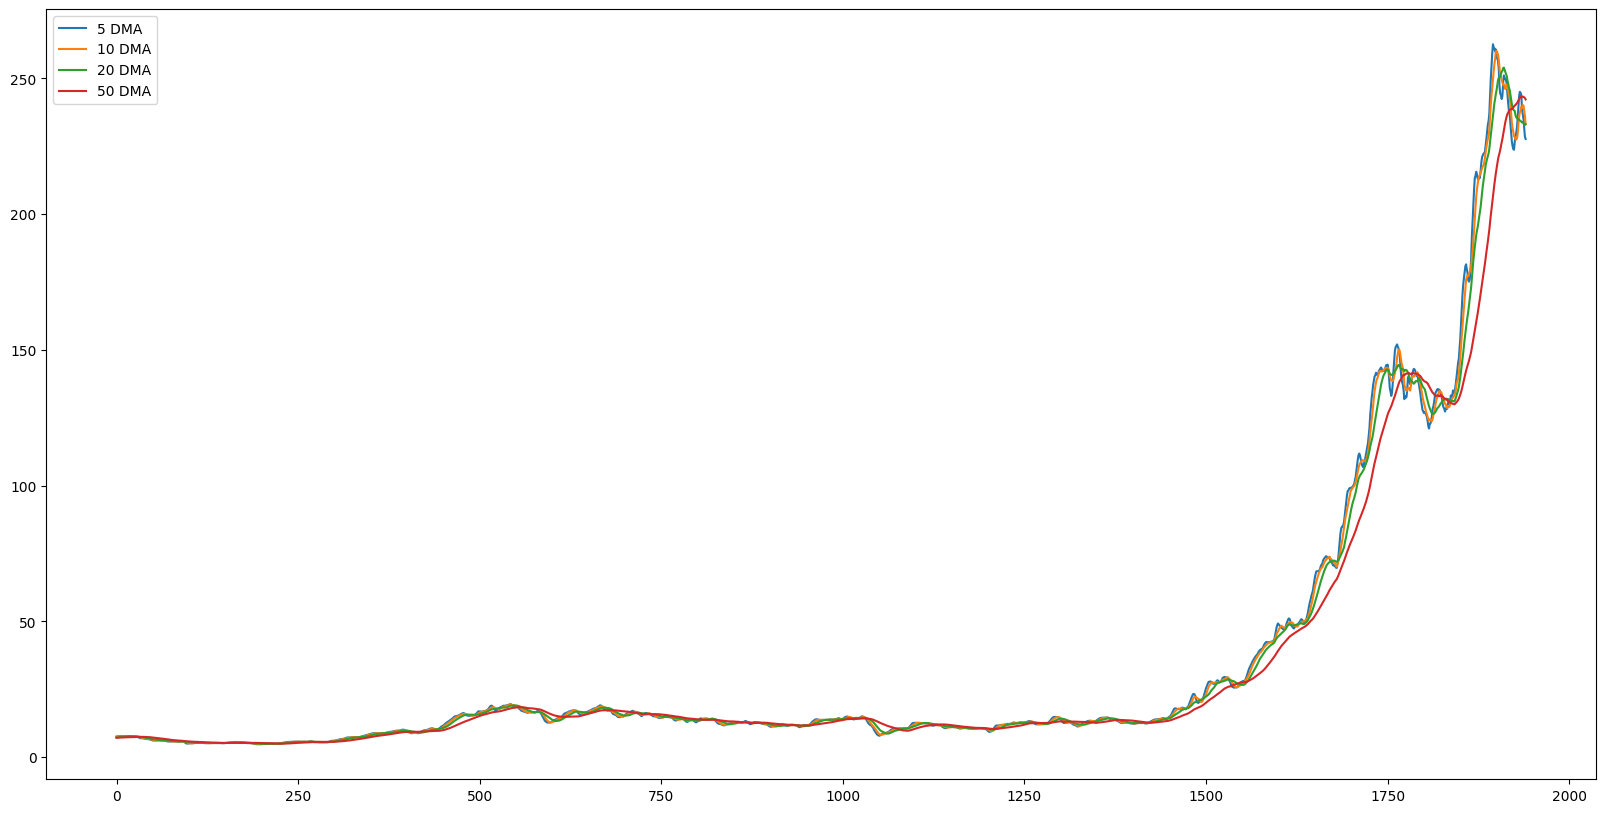

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2016.THYAO.IS.csv')

# Calculate 5-day moving average
five_day = data['Close'].rolling(window=5).mean()

# Calculate 10-day moving average
ten_day = data['Close'].rolling(window=10).mean()

# Calculate 20-day moving average
twenty_day = data['Close'].rolling(window=20).mean()

# Calculate 50-day moving average
fifty_day = data['Close'].rolling(window=50).mean()

DMA = []
# Extract the moving average values into separate NumPy arrays
DMA5 = five_day[49:len(data)-1].dropna().values
DMA10 = ten_day[49:len(data)-1].dropna().values
DMA20 = twenty_day[49:len(data)-1].dropna().values
DMA50 = fifty_day[49:len(data)-1].dropna().values
DMA.append([DMA5,DMA10,DMA20,DMA50])

next_opening = []
features = []
for i in range(49, len(data)-1):
    label = data.iloc[i +1, 4]  # Extract the closing price for the day immediately following the sequence
    next_opening.append(label)
next_opening = np.array(next_opening).reshape(-1, 1)  # Convert the labels list to a NumPy array and reshape it to a column vector

for i in range(49, len(data)-1):
    input = data.iloc[i, 1:7]  # Input sequence (columns 1 to 6) for each iteration
    features.append(input)
features = np.array(features)
# features = features.reshape(features.shape[0], -1)

data["Date"] = pd.to_datetime(data["Date"])
dates = np.array(data.iloc[:, 0])
dates = dates.reshape(len(dates), 1)

for dma in DMA[0]:
    dma = dma.reshape(-1,1)
    features = np.c_[features,dma]
featuresMean = np.mean(features, axis=0, keepdims=True)
labelsMean = np.mean(next_opening, keepdims=True)
features, labels = (features/featuresMean), (next_opening/labelsMean)
features, labels = np.round(features.astype(np.double), decimals=4), np.round(labels.astype(np.double), decimals=4)
result = {"dates": dates, "features":features, "5DMA": DMA5, "10DMA": DMA10,"20DMA": DMA20,"50DMA": DMA50, "labels": next_opening,"labelsMean": labelsMean, "featuresMean": featuresMean}
plt.figure(figsize=(20, 10))
plt.plot(DMA5)
plt.plot(DMA10)
plt.plot(DMA20)
plt.plot(DMA50)
plt.legend(["5 DMA", "10 DMA", "20 DMA", "50 DMA"])

RMSE with 5 DMA:4.473291564898856
R2:0.9956673035548248
MSLE:0.000937912137052504
RMSE with 10 DMA:4.472473377832559
R2:0.9956688883529303
MSLE:0.0009389115709001404
RMSE with 20 DMA:4.4667528462121044
R2:0.9956799607122082
MSLE:0.0009363327216145448
RMSE with 50 DMA:4.4616071099485595
R2:0.9956899084210433
MSLE:0.0009341100907048936


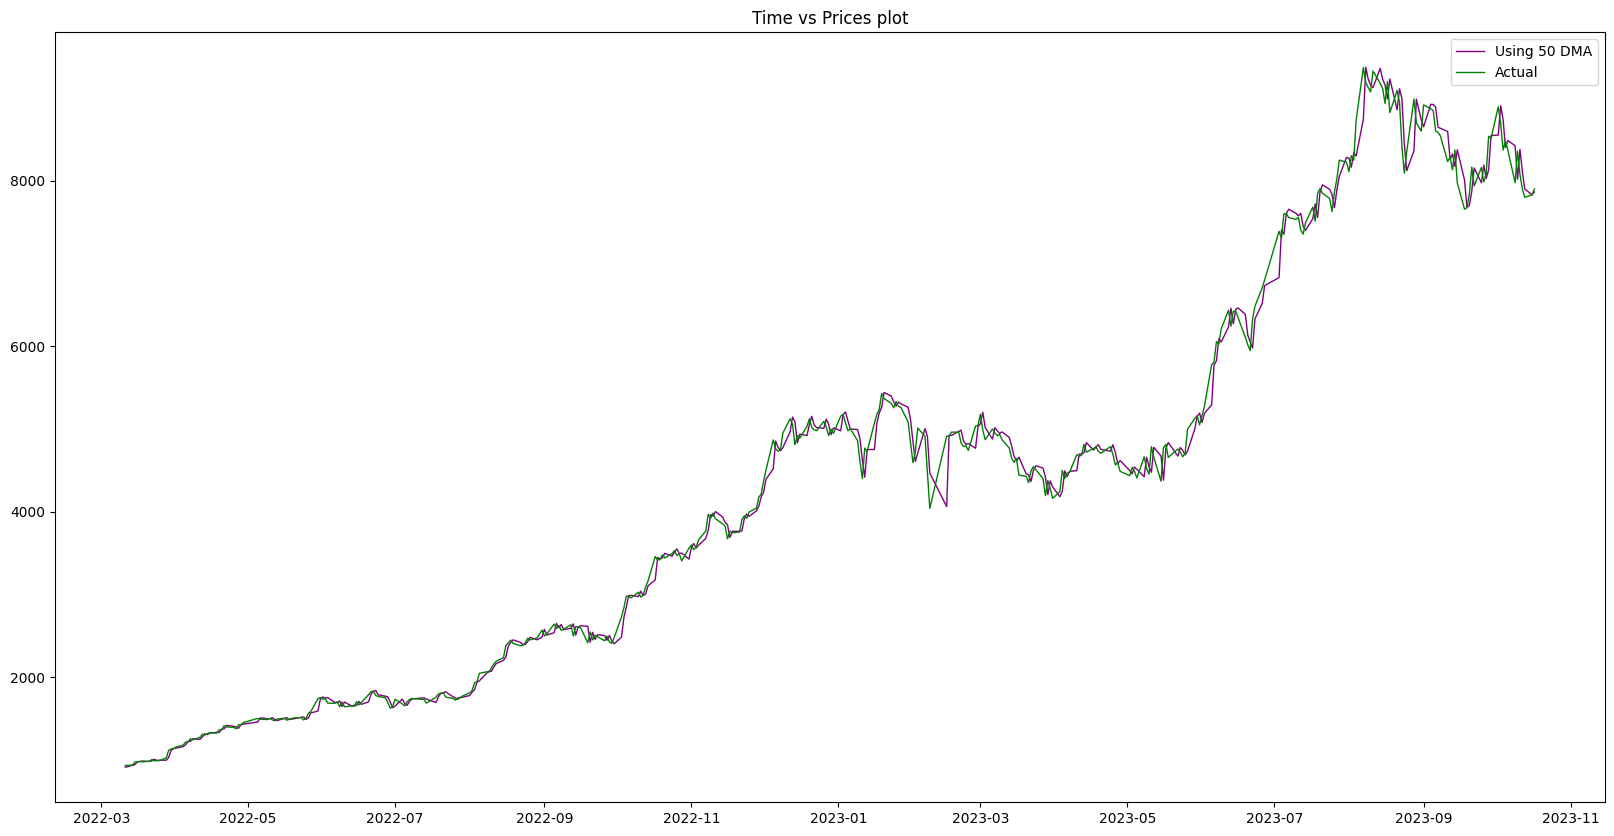

In [ ]:
data_split = 1592
# seperate features and labels for training and validation
train_features = features[:data_split]
test_features = features[data_split - 50:]
train_labels = next_opening[:data_split]
test_labels = next_opening[data_split - 50:]

DMA5 = LinearRegression()
DMA5.fit(train_features[:, [0,1,2,3,5,6]], train_labels)
DMA5_pred = DMA5.predict(test_features[:, [0,1,2,3,5,6]])
#acc5 = DMA5.score(test_features[:, [0,1,2,3,5,6]], test_labels)

# get 10 DMA model
DMA10 = LinearRegression()
DMA10.fit(train_features[:, [0, 1, 2, 3, 5, 7]], train_labels)
DMA10_pred = DMA10.predict(test_features[:, [0, 1, 2, 3, 5, 7]])
#acc10 = DMA10.score(test_features[:, [0, 1, 2, 3, 5, 7]], test_labels)

# get 20 DMA model
DMA20 = LinearRegression()
DMA20.fit(train_features[:, [0, 1, 2, 3, 5, 8]], train_labels)
DMA20_pred = DMA20.predict(test_features[:, [0, 1, 2, 3, 5, 8]])
#acc20 = DMA20.score(test_features[:, [0, 1, 2, 3, 5, 8]], test_labels)

# get 50 DMA model
DMA50 = LinearRegression()
DMA50.fit(train_features[:, [0, 1, 2, 3, 5, 9]], train_labels)
DMA50_pred = DMA50.predict(test_features[:, [0, 1, 2, 3, 5, 9]])
#acc50 = DMA50.score(test_features[:, [0, 1, 2, 3, 5, 9]], test_labels)

# get accuracy of the model
#print("\nAccuracy for 5 DMA:"+str(acc5*100))
print("RMSE with 5 DMA:"+str(np.sqrt(mean_squared_error(test_labels, DMA5_pred))))
print("R2:" + str(r2_score(test_labels, DMA5_pred)))
print("MSLE:" + str(mean_squared_log_error(test_labels, DMA5_pred)))
#print("\nAccuracy for 10 DMA:"+str(acc10*100))
print("RMSE with 10 DMA:"+str(np.sqrt(mean_squared_error(test_labels, DMA10_pred))))
print("R2:" + str(r2_score(test_labels, DMA10_pred)))
print("MSLE:" + str(mean_squared_log_error(test_labels, DMA10_pred)))
#print("\nAccuracy for 20 DMA:"+str(acc20*100))
print("RMSE with 20 DMA:"+str(np.sqrt(mean_squared_error(test_labels, DMA20_pred))))
print("R2:" + str(r2_score(test_labels, DMA20_pred)))
print("MSLE:" + str(mean_squared_log_error(test_labels, DMA20_pred)))
#print("\nAccuracy for 50 DMA:"+str(acc50*100))
print("RMSE with 50 DMA:"+str(np.sqrt(mean_squared_error(test_labels, DMA50_pred))))
print("R2:" + str(r2_score(test_labels, DMA50_pred)))
print("MSLE:" + str(mean_squared_log_error(test_labels, DMA50_pred)))

# plot actual, predicted and 5SMA values for test duration
plt.figure(figsize=(20, 10))
#plt.plot(dates[data_split:], labelsMean*DMA5_pred, linewidth=1, color="black")
#plt.plot(dates[data_split:], result["labelsMean"]*DMA10_pred, linewidth=1, color="orange")
#plt.plot(dates[data_split:], result["labelsMean"]*DMA20_pred, linewidth=1, color="blue")
plt.plot(dates[data_split:], result["labelsMean"]*DMA50_pred, linewidth=1, color="purple")
plt.plot(dates[data_split:], labelsMean*test_labels, color="green", linewidth=1)
#plt.plot(dates[data_split:], featuresMean*(features[data_split - 50:][:6]), color="red", linewidth=1)
#plt.plot(dates[data_split:], featuresMean*(features[data_split - 50:]), color="red", linewidth=1)
plt.legend(["Using 50 DMA", "Actual"])
plt.title("Time vs Prices plot")
plt.show()